In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [38]:
df = pd.read_csv('datasets/Airbnb_Data.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [39]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [40]:
df.isnull().mean() * 100

id                         0.000000
log_price                  0.000000
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.269865
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
first_review              21.405729
host_has_profile_pic       0.253674
host_identity_verified     0.253674
host_response_rate        24.691341
host_since                 0.253674
instant_bookable           0.000000
last_review               21.355804
latitude                   0.000000
longitude                  0.000000
name                       0.000000
neighbourhood              9.272578
number_of_reviews          0.000000
review_scores_rating      22.563452
thumbnail_url             11.086074
zipcode                    1.303450
bedrooms                   0

In [41]:
df.drop(columns = ['first_review', 'host_has_profile_pic', 'last_review', 'thumbnail_url'], inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  host_identity_verified  73923 non-null  object 
 13  host_response_rate      55812 non-null  object 
 14  host_since              73923 non-null

In [42]:
float_cols = ['bathrooms', 'bedrooms', 'beds']
for col in float_cols:
    df[col] = df[col].fillna(df[col].median())
object_cols = ['host_identity_verified', 'host_response_rate', 'host_since', 'neighbourhood', 'review_scores_rating', 'zipcode']
for col in object_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  host_identity_verified  74111 non-null  object 
 13  host_response_rate      74111 non-null  object 
 14  host_since              74111 non-null

In [49]:
df.head(1)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,instant_bookable,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,f,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0


In [32]:
import matplotlib.pyplot as plt

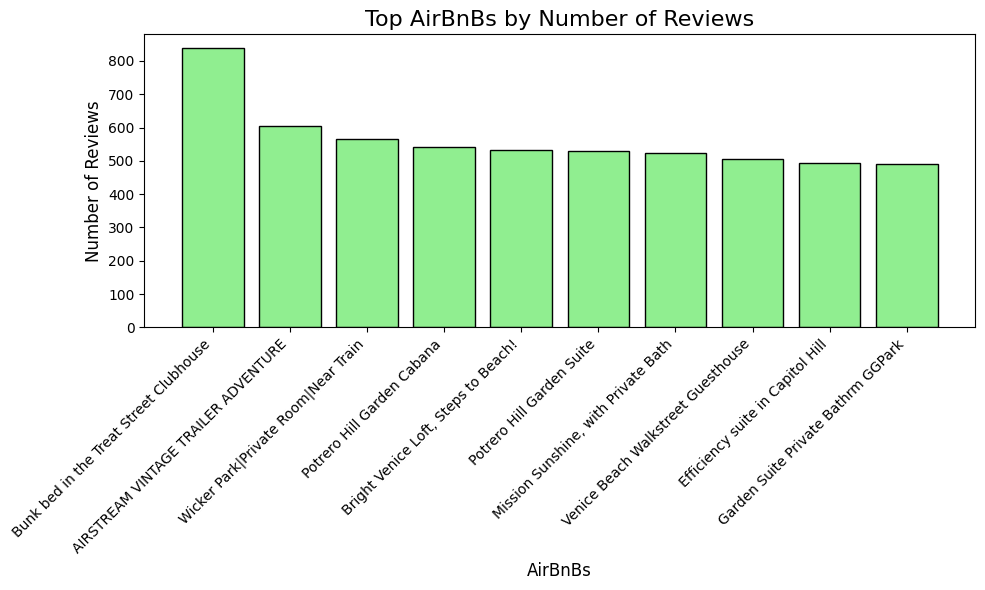

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

reviews_count = df.groupby('name')['number_of_reviews'].sum()

sorted_reviews_count = reviews_count.sort_values(ascending=False)

top_n = 10
top_bnbs = sorted_reviews_count.head(top_n)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_bnbs.index, top_bnbs.values, color='lightgreen', edgecolor='black')

plt.title('Top AirBnBs by Number of Reviews', fontsize=16)
plt.xlabel('AirBnBs', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

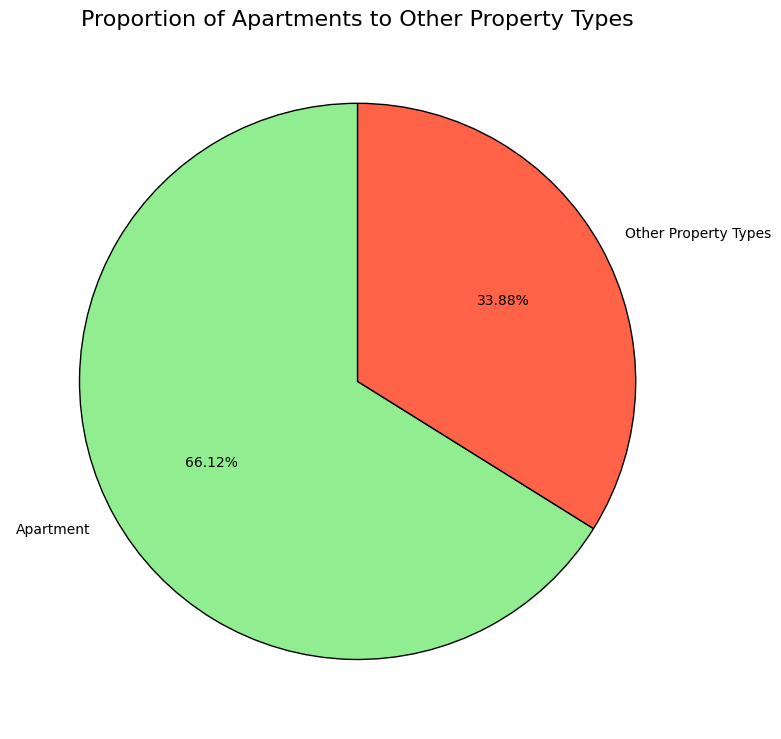

In [51]:
property_type_counts = df['property_type'].value_counts()

apartments_count = property_type_counts.get('Apartment', 0)  
other_properties_count = property_type_counts.sum() - apartments_count  

pie_data = pd.Series({
    'Apartment': apartments_count,
    'Other Property Types': other_properties_count
})

plt.figure(figsize=(8, 8))
plt.pie(
    pie_data.values, 
    labels=pie_data.index, 
    autopct='%1.2f%%',
    startangle=90,     
    colors=['lightgreen', 'tomato'], 
    wedgeprops={'edgecolor': 'black'} 
)

plt.title('Proportion of Apartments to Other Property Types', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  int64  
 3   room_type               74111 non-null  int64  
 4   amenities               74111 non-null  int64  
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  int64  
 8   cancellation_policy     74111 non-null  int64  
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  int64  
 11  description             74111 non-null  int64  
 12  host_identity_verified  74111 non-null  int64  
 13  host_response_rate      74111 non-null  int64  
 14  host_since              74111 non-null

In [24]:
x = df.drop(columns = ['review_scores_rating'])
y = df['review_scores_rating']

In [25]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [26]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 42)

In [28]:
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=3, random_state=42)

In [30]:
y_pred = rf.predict(test_x)

In [31]:
accuracy = accuracy_score(test_y, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4}')

Random Forest Accuracy: 0.4469
